# PYTHON 資料科學期末專題 (二)

[提示]

用Pandas讀入時有時需要注意encoding參數

1.1 引入 Pandas Profiling

1.2 需要注意異常值與缺失值的處理, 注意資料區間, 評估值區間差異過大的問題

1.3 資料的分類, 以期可以分別繪製比對圖形; 

[基本目標]

把 Netflix 的資訊分門別列出來


[進階目標]

畫出Heatmap 與 文字雲(找出最多人看的影片)

# 參考範例

同學可以參照範例執行, 有問題隨時提問

In [69]:
# 載入繪圖相關套件
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling

In [70]:
# 載入資料處理相關套件
from pandas_profiling import ProfileReport
import numpy as np 
import pandas as pd 

In [71]:
#載入資料集
df = pd.read_csv("netflix_titles.csv")
#檢視資料的項目
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [72]:
#查看資料集
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# 透過Pandas Profiling模組來建立ProfileReport報表

In [73]:
#生成資料集的報告, 可以用來檢核可視化結果是否正確
report = ProfileReport(df, title='Netflix Movies and TV Shows', explorative= True)

In [74]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 可將report 檔案匯成html 導出報告

In [75]:
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 資料清洗

### 查看各欄元素是否異常

In [76]:
# 功能：計算axis=0上的不同觀察結果
df.nunique()

# -> Title & Description 有少部分相同值，稍後可進行查看是否異常

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [77]:
#計算缺失值
df.isna().sum()

# Director、Cast 缺失值多，難以手動填補

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

### 先修正 "rating" 這個欄位上的缺失狀況

In [78]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [79]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
211,70129452,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
2411,80144119,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."
3288,80169801,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
4056,80078037,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
4402,80092839,Movie,Fireplace 4K: Classic Crackling Fireplace from...,George Ford,NaN,NaN,"December 21, 2015",2015,NaN,60 min,Movies,"The first of its kind in UHD 4K, with the clea..."
4403,80092835,Movie,Fireplace 4K: Crackling Birchwood from Firepla...,George Ford,NaN,NaN,"December 21, 2015",2015,NaN,60 min,Movies,"For the first time in 4K Ultra-HD, everyone's ..."
4706,80039789,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
5015,80114111,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5234,80161109,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...


### 基於 Netflix shows,我們可以嘗試使用 replacements

In [80]:
rating_replacements = {
    211: 'TV-14',
    2411: 'TV-14',
    3288: 'PG-13',
    4056: 'TV-G',
    4402: 'TV-G',
    4403: 'TV-G',
    4706: 'TV-14',
    5015: 'TV-14',
    5234: 'TV-14',
    6231: 'TV-Y'
}

for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate
    
df['rating'].isna().sum()

0

### 修正date_added 缺失狀況 

In [81]:
miss_date = df[df['date_added'].isna()]
display(miss_date)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6223,70204989,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6225,70153412,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6226,70243132,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6227,80005756,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,TV-Y,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


### 透過與其他資料庫比對，僅能發現一筆遺失日期
### [Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows)

In [82]:
# miss_date_list = [title for title in miss_date['title']] # 將缺失日期的title存入list中

# mask = title_and_date['title'].isin(miss_date_title)　# 使用 isin 將 list內容與資料庫比對

date_replacement = {6231: 'October 18, 2019'}

for id, date in date_replacement.items():
    df.iloc[id, 6] = date

### 將其他缺失值刪除

In [83]:
missing_index = df[df['date_added'].isna()].index
df = df.drop(index=missing_index)
df['date_added'].isna().sum()

0

### 以上述方式繼續修正country 類別的狀況

In [84]:
miss_country = df[df['country'].isna()]
display(miss_country)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,"September 8, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...
12,80182480,Movie,Krish Trish and Baltiboy,NaN,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2009,TV-Y7,58 min,Children & Family Movies,"A team of minstrels, including a monkey, cat a..."
13,80182483,Movie,Krish Trish and Baltiboy: Battle of Wits,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2013,TV-Y7,62 min,Children & Family Movies,"An artisan is cheated of his payment, a lion o..."
14,80182596,Movie,Krish Trish and Baltiboy: Best Friends Forever,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Deepak...",NaN,"September 8, 2017",2016,TV-Y,65 min,Children & Family Movies,"A cat, monkey and donkey team up to narrate fo..."
15,80182482,Movie,Krish Trish and Baltiboy: Comics of India,Tilak Shetty,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2012,TV-Y7,61 min,Children & Family Movies,"In three comic-strip-style tales, a boy tries ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6153,80200027,TV Show,HERO MASK,NaN,"Yasuyuki Kase, Yuhko Kaida, Junpei Morita, Ken...",NaN,"August 23, 2019",2019,TV-14,2 Seasons,"Anime Series, Crime TV Shows, International TV...","After a rash of mysterious deaths, Crown prose..."
6170,80136456,TV Show,Age of Glory,NaN,"Debbie Goh, Aenie Wong, Frederick Lee, Leslie ...",NaN,"August 14, 2017",2010,TV-PG,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Amid the thriving nightlife of 1960s Kuala Lum...
6195,80136790,TV Show,Goodnight DJ 1,NaN,"Chan Fong, Z-Chen, Frederick Lee, Melvin Sia, ...",NaN,"April 27, 2018",2016,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Horror",Young radio announcers from varying background...
6199,80244228,TV Show,Beauty and the Bitches,NaN,"Methinee Kingpayome, Son Songpaisarn, Yingying...",NaN,"April 23, 2019",2016,TV-14,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Beauty pageant contestants from all over Thail...


In [85]:
miss_country_list = [title for title in miss_country['title']] 
display(miss_country_list)

['Joaquín Reyes: Una y no más',
 'Krish Trish and Baltiboy',
 'Krish Trish and Baltiboy: Battle of Wits',
 'Krish Trish and Baltiboy: Best Friends Forever',
 'Krish Trish and Baltiboy: Comics of India',
 'Krish Trish and Baltiboy: Oversmartness Never Pays',
 'Krish Trish and Baltiboy: Part II',
 'Krish Trish and Baltiboy: The Greatest Trick',
 'Castle of Stars',
 'First and Last',
 "Archibald's Next Big Thing",
 'Care of Kancharapalem',
 'Kill Me If You Dare',
 'American Factory: A Conversation with the Obamas',
 'Lovesick',
 'Mak Cun',
 'Out of Thin Air',
 'Satu Hari',
 'Cultivating the Seas: History and Future of the Full-Cycle Cultured Kindai Tuna',
 'TUNA GIRL',
 'Dragons: Rescue Riders',
 'Skylines',
 'Team Kaylie',
 'Battlefish',
 'Criminal: France',
 'Criminal: Germany',
 'Criminal: Spain',
 "Chef's Table: France",
 'Karol Modzelewski, Łukasz „Lotek” Lodkowski No Offense',
 'Katarzyna Piasecka, Rafał Pacześ Seriously Funny',
 'Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszczyk Hi

In [86]:
# mask = df['title'].isin(miss_country_list)
# country_data = df.loc[:, ['title', 'country']][mask]
# country_data = country_data.dropna(axis=0, how='any')
# titles = country_data['title']
# countries = country_data['country']
# country_replacements = dict(zip(titles, countries))



country_replacements = {'The Circle': 'United States, United Kingdom',
 'The Creative Indians': 'India',
 'Bangkok Love Stories: Innocence': 'Thailand',
 'Magical Andes': 'Uruguay, Germany',
 'Skylines': 'United Kingdom, United States',
 'Love Alarm': 'South Korea',
 'Hello Ninja': 'United States',
 'A Love So Beautiful': 'South Korea',
 'Voice': 'South Korea',
 'Terrace House: Tokyo 2019-2020': 'Japan',
 'Little Singham': 'India',
 'Underdogs': 'Argentina, Spain',
 'Patriot Act with Hasan Minhaj': 'United States',
 'Dragons: Rescue Riders': 'United States',
 'Team Kaylie': 'United States',
 'A Fall from Grace': 'United States',
 'Ares': 'Netherlands',
 'Nailed It! Germany': 'Germany',
 'Garfield Gets Real': 'United States',
 'Live Up To Your Name': 'South Korea',
 'Nisman: The Prosecutor, the President, and the Spy': 'Spain, Germany, Denmark, United States',
 'Pokémon the Movie: Power of Us': 'Japan',
 'Reply 1988': 'South Korea',
 'Save Me': 'South Korea',
 'Spinning Out': 'United States',
 'The Bride of Habaek': 'South Korea',
 'Aaviri': 'India',
 "ARASHI's Diary -Voyage-": 'Japan',
 'Benchwarmers 2: Breaking Balls': 'United States',
 'Yanxi Palace: Princess Adventures': 'China',
 'The Disastrous Life of Saiki K.: Reawakened': 'Japan',
 'Hot Gimmick: Girl Meets Boy': 'Japan',
 'Cinderella and the Four Knights': 'South Korea',
 'Cocomong': 'United States',
 'Crash Landing on You': 'South Korea',
 'Crazy, Lovely, Cool': 'Nigeria',
 'Fukrey': 'India',
 'Scooby-Doo!: Mystery Incorporated': 'United States',
 'A Christmas Prince: The Royal Baby': 'United States',
 'The Road to Love': 'Colombia',
 'Tee Shot: Ariya Jutanugarn': 'Thailand',
 'Guatemala: Heart of the Mayan World': 'Uruguay, Guatemala',
 'What the F* Is Going On?': 'Spain',
 'Bangkok Buddies': 'Thailand',
 'Shadow': 'China, Hong Kong',
 'Luccas Neto in: Summer Camp': 'Brazil',
 'Holiday in the Wild': 'United States',
 'Mobile Suit Gundam: Iron-Blooded Orphans': 'Japan',
 'The King': 'United Kingdom, Hungary, Australia',
 'The Old Thieves: The Legend of Artegios': 'Mexico',
 'True: Grabbleapple Harvest': 'Canada',
 'We Are the Wave': 'Germany',
 'Zoé: Panoramas': 'Mexico',
 'Wait, My Youth': 'China',
 'Little Baby Bum: Nursery Rhyme Friends': 'United Kingdom',
 'TUNA GIRL': 'Japan',
 'Criminal: Germany': 'Germany',
 'Criminal: Spain': 'Spain',
 'Kabaneri of the Iron Fortress: The Battle of Unato': 'Japan',
 'Evelyn': 'United Kingdom',
 'Care of Kancharapalem': 'India',
 'Kill Me If You Dare': 'Turkey',
 'American Factory: A Conversation with the Obamas': 'United States',
 'Simon Amstell: Set Free': 'United Kingdom',
 'The Family': 'United States',
 'Sexy Central': 'Hong Kong',
 'The Legend of White Snake': 'China',
 'A Tale of Two Kitchens': 'United States, Mexico',
 'In the Bosom of a Thorn': 'Kuwait',
 'Persona': 'South Korea',
 'ReMastered: The Miami Showband Massacre': 'United States',
 'Alexis Viera: A Story of Surviving': 'Uruguay',
 'Disappearance': 'Egypt',
 'True: Happy Hearts Day': 'United States, Canada',
 'A Taiwanese Tale of Two Cities': 'Taiwan',
 'ReMastered: Massacre at the Stadium': 'United States',
 'Sam Kinison: Live in Vegas': 'United States',
 'Once in a Lifetime Sessions with George Ezra': 'United States',
 'Once in a Lifetime Sessions with Kasabian': 'United States',
 'Once in a Lifetime Sessions with OneRepublic': 'United States',
 'Once in a Lifetime Sessions with Snow Patrol': 'United States',
 'Vir Das: Losing It': 'United States',
 'The Curious Creations of Christine McConnell': 'United States',
 'Hotel Transylvania': 'United States, Canada',
 'Simon': 'France',
 'Best Lover': 'South Korea, China',
 'Lovesick': 'United Kingdom',
 'The Secret': 'Australia, United States',
 'Sudden': 'Singapore',
 'The Dream Catchers': 'Singapore',
 'A House of Blocks': 'Taiwan',
 'Bountiful Blessings': 'Singapore',
 'The In-Laws': 'Singapore',
 'King’s War': 'China',
 'Learning Songs by Little Baby Bum: Nursery Rhyme Friends': 'United Kingdom',
 'Mystic Whispers': 'Singapore',
 'The Ultimatum': 'Singapore',
 'Yes We Can!': 'Singapore',
 '28 Moons': 'South Korea',
 'Mind Game': 'Singapore',
 'What in the World Happened?': 'South Korea',
 'Love Is in the Air': 'United Kingdom',
 'Love Me As I Am': 'Turkey',
 'Happy And': 'South Korea',
 'Bombshell': 'New Zealand',
 'Alarmoty in the Land of Fire': 'Egypt',
 'All Good Ones Get Away': 'Spain, Italy',
 'An Upper Egyptian': 'Egypt',
 'Blood & Treasures': 'Thailand',
 'For the Win': 'United States',
 'JingleKids': 'Russia',
 'Kaaliyan': 'India',
 'Once In A Lifetime Sessions with Moby': 'United States',
 'Once In A Lifetime Sessions with Nile Rodgers': 'United States',
 'Once In A Lifetime Sessions with Noel Gallagher': 'United States',
 'Once In A Lifetime Sessions with TLC': 'United States',
 'Oru Vishsheshapetta Biryani Kissa': 'India',
 'Stone Age': 'South Korea',
 'Super Bheem': 'India',
 'Super Bheem Bana Vajraveer': 'India',
 'The Croods': 'United States',
 'The Iron Lady': 'United Kingdom, France',
 'The Player': 'Egypt'}

In [87]:
for title, country in country_replacements.items():  # 使用迴圈依照鍵值迭代入原資料
    df.country[df.title == title] = country

In [88]:
display(df[df['title']=='The Iron Lady']) # 驗證是否修改正確

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2772,70189282,Movie,The Iron Lady,Phyllida Lloyd,"Meryl Streep, Jim Broadbent, Alexandra Roach, ...","United Kingdom, France","July 7, 2019",2011,PG-13,105 min,"Dramas, International Movies","Margaret Thatcher, the first female prime mini..."
5023,80136455,TV Show,The Iron Lady,NaN,"Yeo Yann Yann, Aenie Wong, Seck Fook Yee, Jack...","United Kingdom, France","August 14, 2017",2009,TV-PG,1 Season,"International TV Shows, TV Dramas","After business troubles destroy her father, a ..."


### 如將剩餘351筆遺失值填入眾數(United Sates)可能造成資料誤差更大，因此決定drop掉

In [89]:
df['country'].mode()[0]

'United States'

In [90]:
miss_country_index = df[df['country'].isna()].index
df = df.drop(index=miss_country_index)
display(len(df[df['country'].isna()]))

0

### 為了簡單處理, 將Director & Cast 欄位填入"Missing"

In [91]:
df['director'].fillna('Missing',inplace=True)
df['cast'].fillna('Missing',inplace=True)
display(df.isnull().sum())
display(df.columns)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 確認缺失值的處理是否完整

In [92]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 產生新的特徵

In [93]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Missing,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Missing,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Missing,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### 利用日期相加取得新的年月資料

我們將從date_add中獲取年份和月份，以便我們可以比較最有價值的月份: 在Show release與Netflix新增日期的部分

In [94]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.strftime('%Y')
df['month_added'] = df['date_added'].dt.strftime('%B')

In [95]:
df['year_added']

0       2019
1       2016
2       2018
3       2018
4       2017
        ... 
6219    2019
6220    2016
6221    2016
6222    2014
6231    2019
Name: year_added, Length: 5873, dtype: object

### 根據分級顯示受眾

### 也許能透過節目分級顯示觀眾年齡層分布與變化

In [96]:
# 依美國電影/電視分級制度劃分各年齡層
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'All',
    'PG': 'Older Kids',
    'G': 'All',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [97]:
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Older Kids', 'Adults', 'Teens', 'All', 'Kids'], dtype=object)

### Country 

在某些條目中，國家具有多個值。所以將在第一列中添加一個新列，以便我們檢查witch區域是否有更多作品

In [98]:
# Lets retrieve just the first country
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

0     United States
1    United Kingdom
2     United States
3     United States
4     United States
Name: principal_country, dtype: object

In [99]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,September,Older Kids,United States
1,80117401,Movie,Jandino: Whatever it Takes,Missing,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,September,Adults,United Kingdom
2,70234439,TV Show,Transformers Prime,Missing,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September,Older Kids,United States
3,80058654,TV Show,Transformers: Robots in Disguise,Missing,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September,Older Kids,United States
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September,Teens,United States


## 修正日期型別

In [100]:
df.dtypes

show_id                       int64
type                         object
title                        object
director                     object
cast                         object
country                      object
date_added           datetime64[ns]
release_year                  int64
rating                       object
duration                     object
listed_in                    object
description                  object
year_added                   object
month_added                  object
target_ages                  object
principal_country            object
dtype: object

In [101]:
# type should be a category
df['type'] = pd.Categorical(df['type'])
# target_ages is another category (5 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Older Kids', 'Adults', 'Teens', 'All', 'Kids'])

# Year added should be integer so we can compare with `released_year`
df['year_added'] = pd.to_numeric(df['year_added'])

In [102]:
df.dtypes

show_id                       int64
type                       category
title                        object
director                     object
cast                         object
country                      object
date_added           datetime64[ns]
release_year                  int64
rating                       object
duration                     object
listed_in                    object
description                  object
year_added                    int64
month_added                  object
target_ages                category
principal_country            object
dtype: object

# 資料視覺化

In [103]:
print(df['listed_in'].head(10))

0                   Children & Family Movies, Comedies
1                                      Stand-Up Comedy
2                                             Kids' TV
3                                             Kids' TV
4                                             Comedies
5    Crime TV Shows, International TV Shows, Spanis...
6    International Movies, Sci-Fi & Fantasy, Thrillers
7                                      Stand-Up Comedy
8                      Docuseries, Science & Nature TV
9                        Action & Adventure, Thrillers
Name: listed_in, dtype: object


# TV shows 跟 Movies的比例

In [104]:
fig = px.pie(df['type'].value_counts().reset_index(), values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 對各級別與對應年齡層作比較

In [105]:
# 透過此函式計算各級別所占次數
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [106]:
rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages')
fig.show()

### 分別過濾出TV Shows、Movie的資料

In [107]:
df['genre'] = df['listed_in'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))

In [108]:
movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']

In [109]:
# 影集與電影的比較
movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.3, hoverinfo="label+percent")
fig.update_layout(
    title_text="Rating Distribution By Type",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.195, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.815, y=0.5, font_size=12, showarrow=False)])
fig.show()

### 使用圓餅圖查看各國別產出的影集+電影數量

In [110]:
country_df = df['principal_country'].value_counts().reset_index()
# country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]
country_df = country_df.head(20)
fig = px.pie(country_df, values='principal_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [111]:
fig = px.bar(country_df, x='principal_country',y='index')
fig.update_yaxes(categoryorder='total descending')
fig.update_layout(xaxis_title='Production Number', yaxis_title='Country')
fig.show()

### 排序時間以觀察歷史資料

In [112]:
display(df.groupby(['release_year', 'type']).agg({'show_id':'count'}).sort_values(by='release_year').reset_index())
display(df.groupby(['year_added', 'type']).agg({'show_id':'count'}).sort_values(by='year_added').reset_index())

,release_year,type,show_id
0,1942,Movie,2
1,1942,TV Show,0
2,1943,Movie,3
3,1943,TV Show,0
4,1944,Movie,3
...,...,...,...
137,2018,TV Show,364
138,2019,Movie,372
139,2019,TV Show,405
140,2020,Movie,6


,year_added,type,show_id
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2009,TV Show,0
4,2010,Movie,1
5,2010,TV Show,0
6,2011,Movie,13
7,2011,TV Show,0
8,2012,Movie,4
9,2012,TV Show,2


### 可看到兩項內容皆在近年快速成長

In [113]:
released_year_df = df.groupby(['release_year', 'type']).agg({'show_id':'count'}).sort_values(by='release_year').reset_index()
added_year_df = df.groupby(['year_added', 'type']).agg({'show_id':'count'}).sort_values(by='year_added').reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

### 如果將時間範圍縮小至2008年後

In [114]:
released_year_df = df[df['release_year']>2008].groupby(['release_year', 'type']).agg({'show_id':'count'}).sort_values(by='release_year').reset_index()
added_year_df = df[df['year_added']>2008].groupby(['year_added', 'type']).agg({'show_id':'count'}).sort_values(by='year_added').reset_index()

In [115]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

<AxesSubplot:xlabel='release_year', ylabel='Count'>

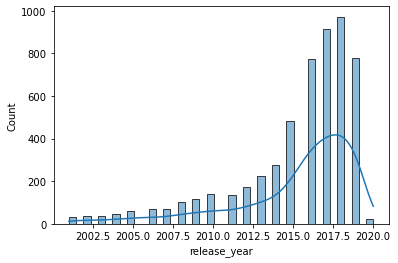

In [116]:
from scipy.stats import norm

sns.histplot(df.loc[df['release_year'] > 2000, 'release_year'], kde=True)


## 建立內容類型的數據框

### 在原先類別欄位中，可能同時將多種類別劃分至一筆資料中
### 因此使用分隔符號區隔各類型

In [117]:
#導入SKLEARN的前處理套件, 將元素進行二元變換 , 輸入的資料會轉換成一個 一維 classes_

from sklearn.preprocessing import MultiLabelBinarizer 

In [118]:
#每組資料會轉換成和 classes_ 相同大小的一維陣列
#如果資料有對應到 classes_  就為 1 否則為 0
#傳回classes_ 會依序排列

def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [119]:
def top_genres(df, title=''):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [120]:
top_genres(movie_df, title='Top Movies Genres')

In [121]:
top_genres(show_df, title='Top TV Shows Genres')

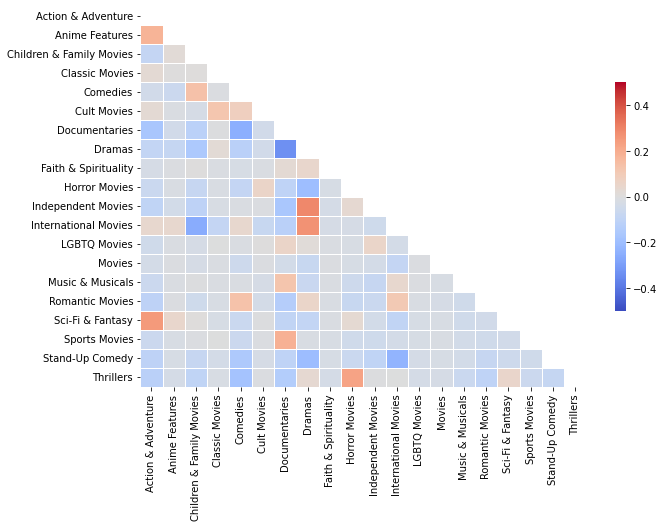

In [122]:
# 對每一類別依相關係數製作heatmap
genres_df = calculate_mlb(movie_df['genre'])

movie_corr = genres_df.corr()

# 相關係數表依對角線會有重複數值，因此將上半部移除
movie_mask = np.zeros_like(movie_corr, dtype=bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

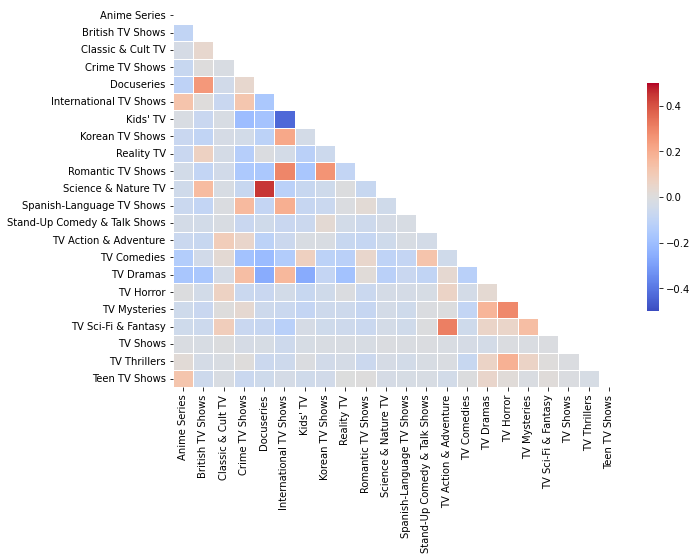

In [123]:
genres_df = calculate_mlb(show_df['genre'])

show_corr = genres_df.corr()
show_mask = np.zeros_like(show_corr, dtype=bool)
show_mask[np.triu_indices_from(show_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

## 使用文字雲, 找出最多被使用在資料集上的描述
### [Documentation](http://amueller.github.io/word_cloud/)

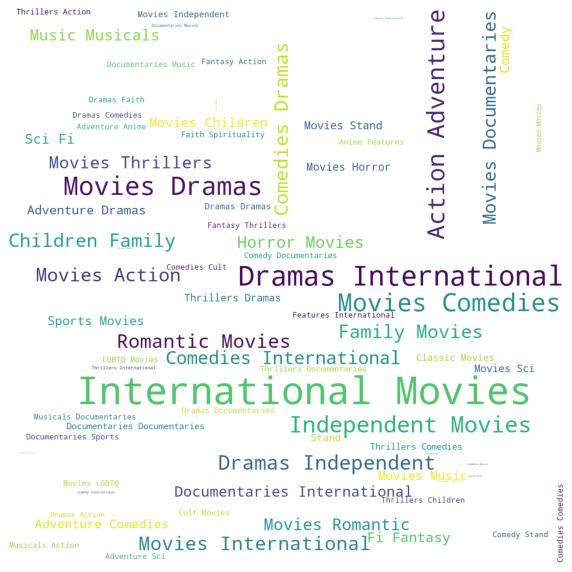

In [124]:
from wordcloud import WordCloud

text = str(list(movie_df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (10, 15)

# generate(text)可自動統計文字、製作文字雲
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 130).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud.png')

### 分析TV SHOW系列持續時間

In [125]:
fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()

In [126]:
results=[]
for i in df['genre'].values:
    c = Counter(i)
    results.append(c)
display(results)


[Counter({'Children & Family Movies': 1, 'Comedies': 1}),
 Counter({'Stand-Up Comedy': 1}),
 Counter({"Kids' TV": 1}),
 Counter({"Kids' TV": 1}),
 Counter({'Comedies': 1}),
 Counter({'Crime TV Shows': 1,
          'International TV Shows': 1,
          'Spanish-Language TV Shows': 1}),
 Counter({'International Movies': 1, 'Sci-Fi & Fantasy': 1, 'Thrillers': 1}),
 Counter({'Stand-Up Comedy': 1}),
 Counter({'Docuseries': 1, 'Science & Nature TV': 1}),
 Counter({'Action & Adventure': 1, 'Thrillers': 1}),
 Counter({'Action & Adventure': 1, 'Dramas': 1, 'International Movies': 1}),
 Counter({'Cult Movies': 1, 'Dramas': 1, 'Independent Movies': 1}),
 Counter({'Comedies': 1, 'Independent Movies': 1, 'Romantic Movies': 1}),
 Counter({'Action & Adventure': 1, 'Comedies': 1, 'International Movies': 1}),
 Counter({'Documentaries': 1}),
 Counter({'Horror Movies': 1, 'Thrillers': 1}),
 Counter({'Dramas': 1, 'Independent Movies': 1}),
 Counter({'Dramas': 1, 'Independent Movies': 1, 'Romantic Movies'

In [127]:
time_type = pd.DataFrame(results).fillna(0)
time_type

,Children & Family Movies,Comedies,Stand-Up Comedy,Kids' TV,Crime TV Shows,International TV Shows,Spanish-Language TV Shows,International Movies,Sci-Fi & Fantasy,Thrillers,...,Anime Series,LGBTQ Movies,TV Horror,Movies,Stand-Up Comedy & Talk Shows,TV Sci-Fi & Fantasy,Classic Movies,Sports Movies,TV Shows,Classic & Cult TV
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5869,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5870,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
time_type1 = time_type.copy()
time_type1['year'] = df['year_added']
time_data = time_type1.groupby(['year']).sum()
time_data

,Children & Family Movies,Comedies,Stand-Up Comedy,Kids' TV,Crime TV Shows,International TV Shows,Spanish-Language TV Shows,International Movies,Sci-Fi & Fantasy,Thrillers,...,Anime Series,LGBTQ Movies,TV Horror,Movies,Stand-Up Comedy & Talk Shows,TV Sci-Fi & Fantasy,Classic Movies,Sports Movies,TV Shows,Classic & Cult TV
year,,,,,,,,,,,,,,,,,,,,,
2008.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011.0,1.0,4.0,0.0,0.0,1.0,1.0,0.0,9.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2014.0,1.0,7.0,0.0,0.0,0.0,3.0,0.0,6.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
2015.0,3.0,8.0,4.0,2.0,7.0,17.0,2.0,17.0,0.0,4.0,...,4.0,0.0,3.0,4.0,0.0,2.0,2.0,2.0,0.0,0.0
2016.0,28.0,66.0,26.0,16.0,20.0,71.0,7.0,128.0,15.0,32.0,...,7.0,7.0,5.0,3.0,0.0,3.0,3.0,11.0,1.0,3.0


In [129]:
import plotly.express as px
fig = px.line(time_data, x=time_data.index, y=time_data.columns)
fig.update_layout(title_text="Genres Changes Over Time",
                  title_font_size=20,
                 template='plotly_dark',
                 yaxis_title="Quantity",
                 xaxis_title="Year",
                 legend_title_text='Genres')
fig.show()